In [3]:

import numpy as np
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import cifar100

In [4]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
X_train, X_test = X_train/255, X_test/255
y_train, y_test = y_train.flatten(), y_test.flatten()
print(X_train.shape)
print(y_train.shape)

169001437/169001437 [==============================] - 18s 0us/step
(50000, 32, 32, 3)
(50000,)


In [5]:
k = len(set(y_train))
k
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)
datagen.fit(X_train)

In [15]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.15)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.15)(x)
x = Dense(k, activation='softmax')(x)
model = Model(i, x)


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8)


Epoch 1/8
1563/1563 [==============================] - 21s 10ms/step - loss: 3.5092 - accuracy: 0.1836 - val_loss: 2.9926 - val_accuracy: 0.2651
Epoch 2/8
1563/1563 [==============================] - 16s 10ms/step - loss: 2.6239 - accuracy: 0.3322 - val_loss: 2.4438 - val_accuracy: 0.3673
Epoch 3/8
1563/1563 [==============================] - 16s 10ms/step - loss: 2.2110 - accuracy: 0.4177 - val_loss: 2.1427 - val_accuracy: 0.4379
Epoch 4/8
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8968 - accuracy: 0.4855 - val_loss: 2.0300 - val_accuracy: 0.4643
Epoch 5/8
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6451 - accuracy: 0.5452 - val_loss: 1.9272 - val_accuracy: 0.4938
Epoch 6/8
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3987 - accuracy: 0.6014 - val_loss: 1.9495 - val_accuracy: 0.4975
Epoch 7/8
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1816 - accuracy: 0.6536 - val_loss: 1.9488 - val_ac

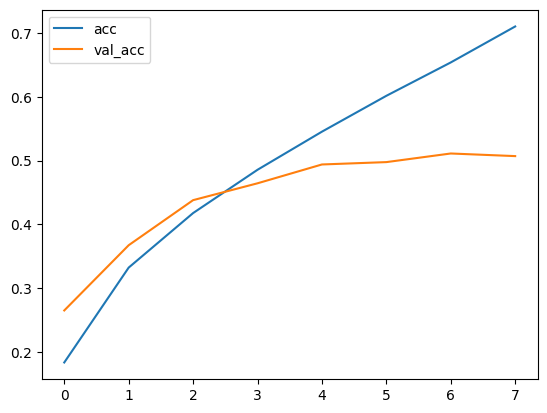

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
#gráfico com dropout em 0.2

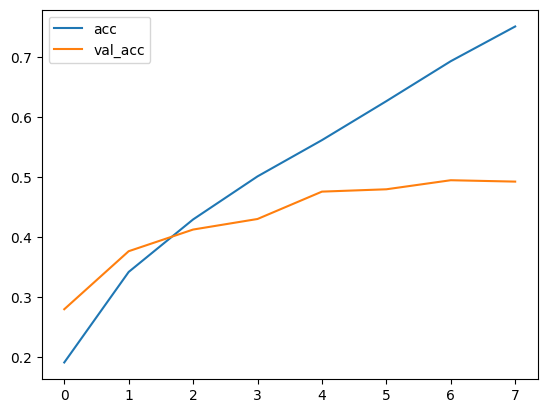

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
#gráfico com dropout em 0.1

1/1 [==============================] - 1s 513ms/step
[42]


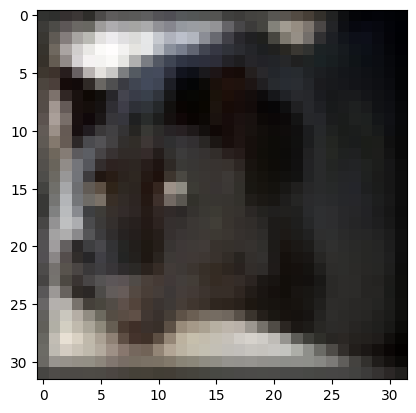

In [18]:
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
test=(X_train[3365])

print(np.argmax(model.predict(test.reshape(1,32,32,3)), axis=1))
img=array_to_img(test)
plt.imshow(img)

Classes
0	apple
1	aquarium_fish
2	baby
3	bear
4	beaver
5	bed
6	bee
7	beetle
8	bicycle
9	bottle
10	bowl
11	boy
12	bridge
13	bus
14	butterfly
15	camel
16	can
17	castle
18	caterpillar
19	cattle
20	chair
21	chimpanzee
22	clock
23	cloud
24	cockroach
25	couch
26	crab
27	crocodile
28	cup
29	dinosaur
30	dolphin
31	elephant
32	flatfish
33	forest
34	fox
35	girl
36	hamster
37	house
38	kangaroo
39	keyboard
40	lamp
41	lawn_mower
42	leopard
43	lion
44	lizard
45	lobster
46	man
47	maple_tree
48	motorcycle
49	mountain
50	mouse
51	mushroom
52	oak_tree
53	orange
54	orchid
55	otter
56	palm_tree
57	pear
58	pickup_truck
59	pine_tree
60	plain
61	plate
62	poppy
63	porcupine
64	possum
65	rabbit
66	raccoon
67	ray
68	road
69	rocket
70	rose
71	sea
72	seal
73	shark
74	shrew
75	skunk
76	skyscraper
77	snail
78	snake
79	spider
80	squirrel
81	streetcar
82	sunflower
83	sweet_pepper
84	table
85	tank
86	telephone
87	television
88	tiger
89	tractor
90	train
91	trout
92	tulip
93	turtle
94	wardrobe
95	whale
96	willow_tree
97	wolf
98	woman
99	worm